<a href="https://colab.research.google.com/github/samarawwleticia/challengedadosalura/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [83]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [63]:
# A loja 4 tem uma linha a menos, provavelmente um produto a menos vendido

print(loja4.shape)
print(loja3.shape)
print(loja2.shape)
print(loja.shape)

(2358, 12)
(2359, 12)
(2359, 12)
(2359, 12)


#1. Análise do faturamento



In [64]:
faturamentoTotal_loja = loja['Preço'].sum()

faturamentoTotal_loja2 = loja2['Preço'].sum()

faturamentoTotal_loja3 = loja3['Preço'].sum()

faturamentoTotal_loja4 = loja4['Preço'].sum()

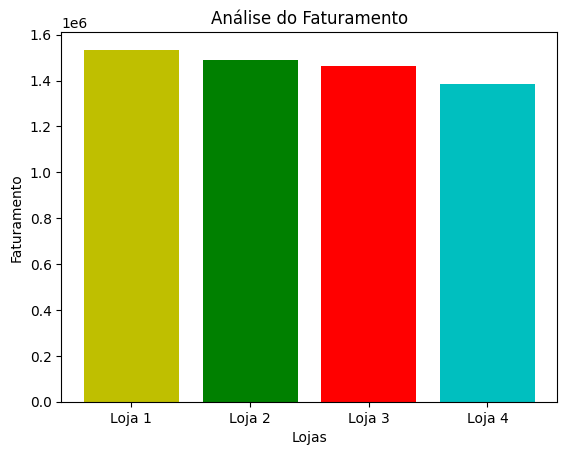

In [65]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Coloquei cores só para diferencias as lojas mas não consegui reutiliza-las em todos os gráficos
cores = ['y', 'g', 'r', 'c']

faturamentos = [faturamentoTotal_loja, faturamentoTotal_loja2, faturamentoTotal_loja3, faturamentoTotal_loja4]

plt.bar(x = lojas, height = faturamentos, color = cores)
plt.title("Análise do Faturamento")
plt.xlabel("Lojas")
plt.ylabel("Faturamento")
plt.show()

In [66]:
# Verificação dos valores, uma vez que no gráfico estão em outro formato por via de estética.
print("Faturamento da Loja 1: ", faturamentoTotal_loja)
print("Faturamento da Loja 2: ",faturamentoTotal_loja2)
print("Faturamento da Loja 3: ",faturamentoTotal_loja3)
print("Faturamento da Loja 4: ",faturamentoTotal_loja4)

Faturamento da Loja 1:  1534509.12
Faturamento da Loja 2:  1488459.06
Faturamento da Loja 3:  1464025.03
Faturamento da Loja 4:  1384497.58


Como pode ser observado, o faturamento da Loja 1 é o maior entre todas as lojas. No caso da loja 1, o faturamento total é de R$1.534.509,12 ou Um milhão e quinhentos e trinta e quatro mil e quinhentos e nove reais com doze centavos. É a única loja que chegou a 1.5 milhões.

# 2. Vendas por Categoria

In [67]:
# Basicamente o que estou fazendo aqui é contando cada Produto por categoria

vendaporCategoria_loja = loja.groupby('Categoria do Produto')[['Produto']].count()
vendaporCategoria_loja2 = loja2.groupby('Categoria do Produto')[['Produto']].count()
vendaporCategoria_loja3 = loja3.groupby('Categoria do Produto')[['Produto']].count()
vendaporCategoria_loja4 = loja4.groupby('Categoria do Produto')[['Produto']].count()

In [68]:
vendasgerais_loja = vendaporCategoria_loja['Produto'].sum()
vendasgerais_loja2 = vendaporCategoria_loja2['Produto'].sum()
vendasgerais_loja3 = vendaporCategoria_loja3['Produto'].sum()
vendasgerais_loja4 = vendaporCategoria_loja4['Produto'].sum()


### Categorias Mais Populares

Juntei todas as vendas por categoria em um único dataframe para facilitar a criação de gráficos

In [69]:
vendasPopulares = vendaporCategoria_loja
vendasPopulares.rename(columns={'Produto': 'Vendas_Loja1'}, inplace = True)

vendasPopulares['Vendas_Loja2'] = vendaporCategoria_loja2['Produto']
vendasPopulares['Vendas_Loja3'] = vendaporCategoria_loja3['Produto']
vendasPopulares['Vendas_Loja4'] = vendaporCategoria_loja4['Produto']

vendasPopulares



,Vendas_Loja1,Vendas_Loja2,Vendas_Loja3,Vendas_Loja4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


Text(0.5, 1.0, 'Vendas por Categoria')

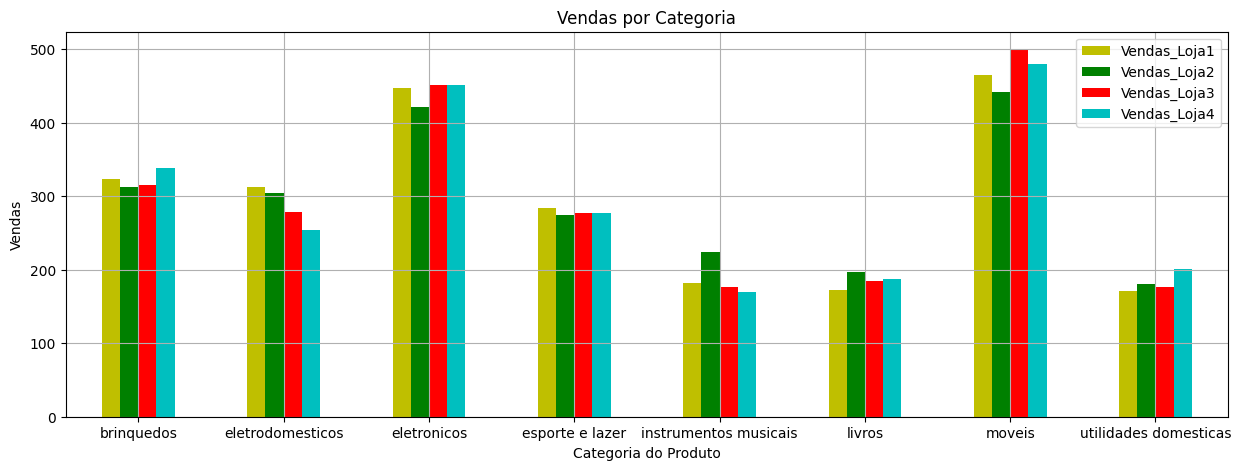

In [70]:
ax = vendasPopulares.plot.bar(rot=0, figsize=(15, 5), grid=True, ylabel='Vendas', color=['y', 'g', 'r', 'c'])
ax.set_title("Vendas por Categoria")

Com o gráfico acima, podemos ver claramente que as categorias mais populares são **brinquedos**, **eletrodomesticos**, **eletronicos**, **esporte & lazer** e **moveis**.

# 3. Média de Avaliação das Lojas


<Axes: >

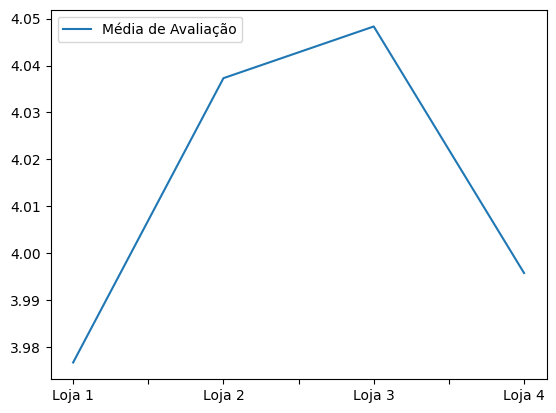

In [71]:
mediaTotal1 = loja['Avaliação da compra'].mean()
mediaTotal2 = loja2['Avaliação da compra'].mean()
mediaTotal3 = loja3['Avaliação da compra'].mean()
mediaTotal4 = loja4['Avaliação da compra'].mean()

medias = [mediaTotal1, mediaTotal2, mediaTotal3, mediaTotal4]
index = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

df = pd.DataFrame(medias, index=index, columns=['Média de Avaliação'])
df.plot()



In [72]:
mediaLoja1 = loja.groupby('Categoria do Produto')['Avaliação da compra'].mean()
mediaLoja2 = loja2.groupby('Categoria do Produto')['Avaliação da compra'].mean()
mediaLoja3 = loja3.groupby('Categoria do Produto')['Avaliação da compra'].mean()
mediaLoja4 = loja4.groupby('Categoria do Produto')['Avaliação da compra'].mean()

mediaGeral = mediaLoja1.to_frame(name='Media_Loja1')

mediaGeral['Media_Loja2'] = mediaLoja2
mediaGeral['Media_Loja3'] = mediaLoja3
mediaGeral['Media_Loja4'] = mediaLoja4



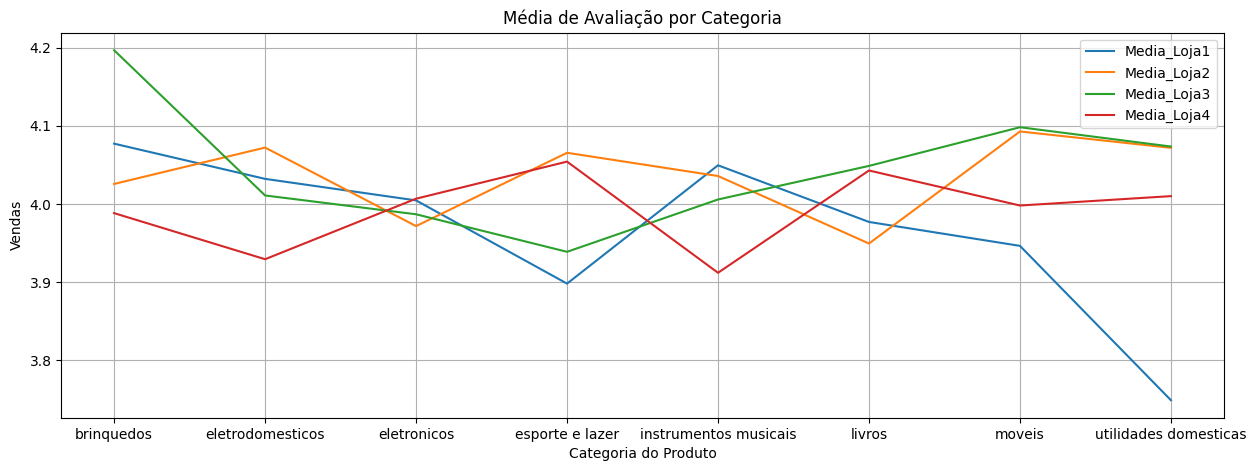

In [73]:
plot = mediaGeral.plot(title="Média de Avaliação por Categoria", figsize=(15, 5), grid=True, ylabel='Vendas')


# 4. Produtos Mais e Menos Vendidos

In [84]:
# criando df 1
maisVendidos_loja = loja.groupby('Produto')[['Preço']].count().sort_values(by='Preço',ascending=False)

maisVendidos_loja.rename(columns={'Preço': 'Unidades_Vendidas'}, inplace=True)

# mais vendidos
produtosMaisVendidos1 = maisVendidos_loja.head(5)

#menos vendidos
produtosMenosVendidos1 = maisVendidos_loja.tail(5)

# ----------------------------------------------------------------------------

# criando df 2
maisVendidos_loja2 = loja2.groupby('Produto')[['Preço']].count().sort_values(by='Preço',ascending=False)

maisVendidos_loja2.rename(columns={'Preço': 'Unidades_Vendidas'}, inplace=True)

# mais vendidos
produtosMaisVendidos2 = maisVendidos_loja2.head(5)

#menos vendidos
produtosMenosVendidos2 = maisVendidos_loja2.tail(5)

# ----------------------------------------------------------------------------

# criando df 3
maisVendidos_loja3 = loja3.groupby('Produto')[['Preço']].count().sort_values(by='Preço',ascending=False)

maisVendidos_loja3.rename(columns={'Preço': 'Unidades_Vendidas'}, inplace=True)

# mais vendidos
produtosMaisVendidos3 = maisVendidos_loja3.head(5)

#menos vendidos
produtosMenosVendidos3 = maisVendidos_loja3.tail(5)

# ----------------------------------------------------------------------------

# criando df 4
maisVendidos_loja4 = loja4.groupby('Produto')[['Preço']].count().sort_values(by='Preço',ascending=False)

maisVendidos_loja4.rename(columns={'Preço': 'Unidades_Vendidas'}, inplace=True)

# mais vendidos
produtosMaisVendidos4 = maisVendidos_loja4.head(5)

#menos vendidos
produtosMenosVendidos4 = maisVendidos_loja4.tail(5)



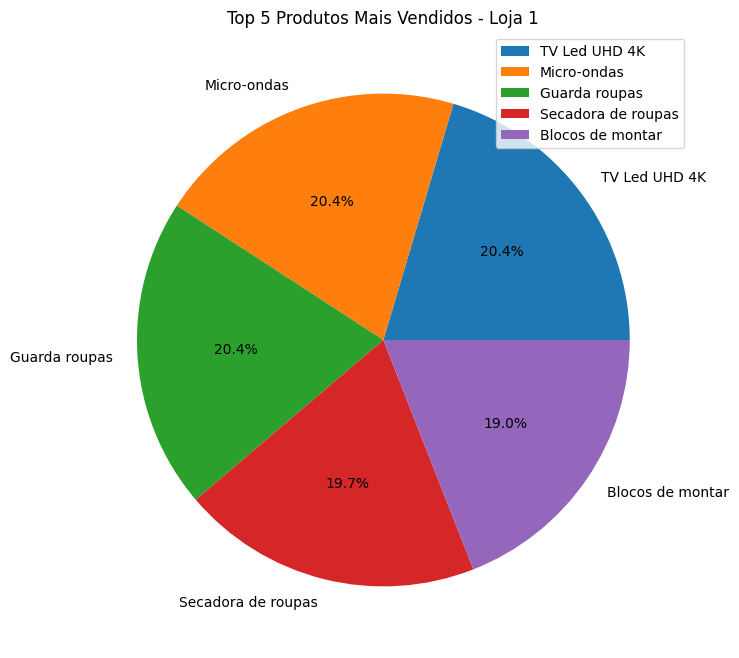

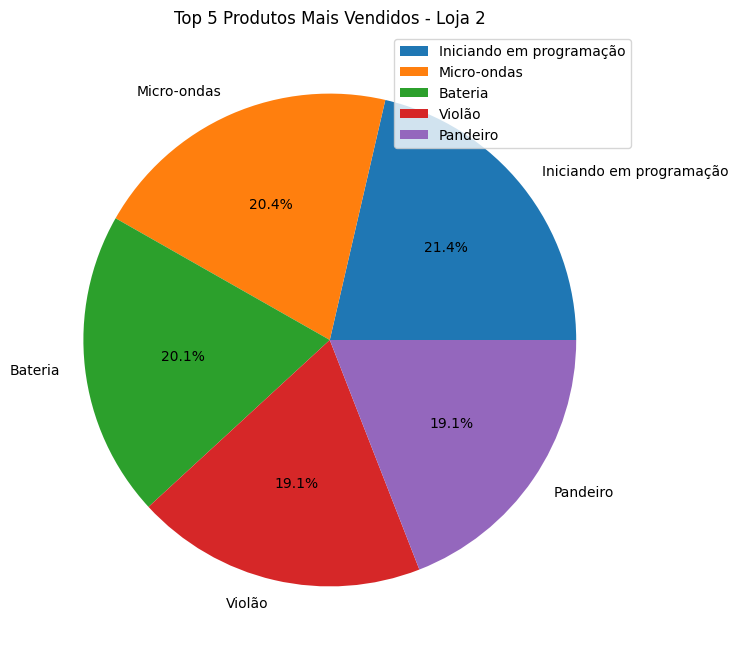

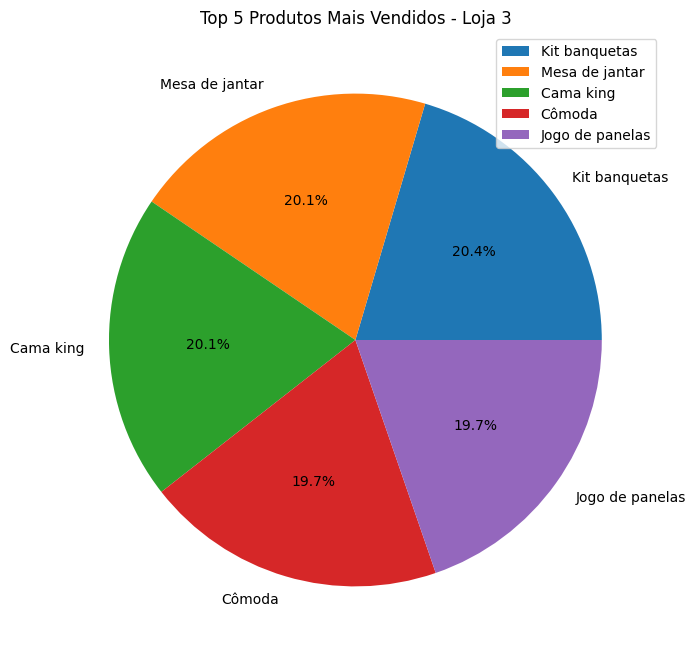

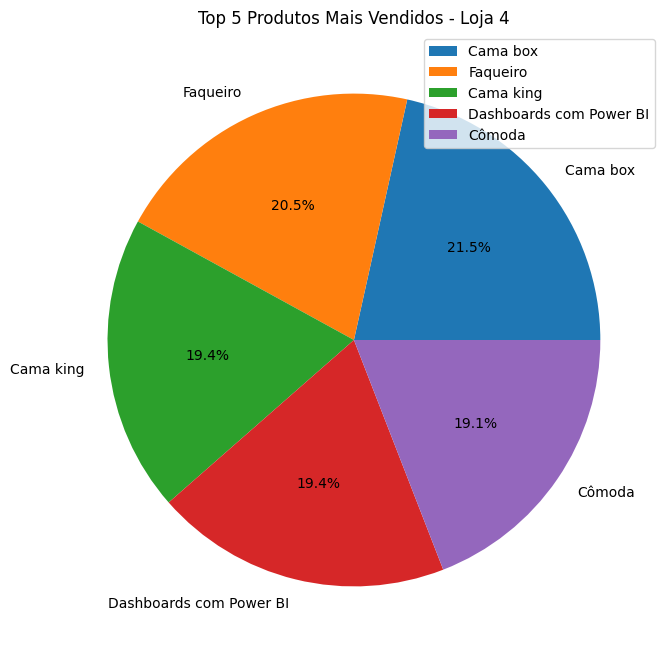

In [95]:
plot = produtosMaisVendidos1.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Mais Vendidos - Loja 1')
plt.ylabel('')
plt.show()

plot = produtosMaisVendidos2.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Mais Vendidos - Loja 2')
plt.ylabel('')
plt.show()

plot = produtosMaisVendidos3.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Mais Vendidos - Loja 3')
plt.ylabel('')
plt.show()

plot = produtosMaisVendidos4.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Mais Vendidos - Loja 4')
plt.ylabel('')
plt.show()



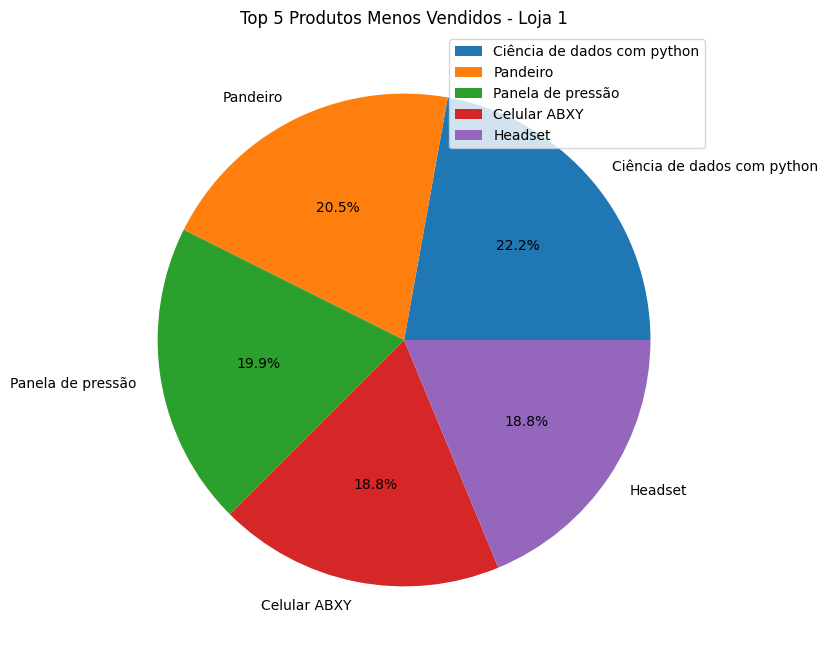

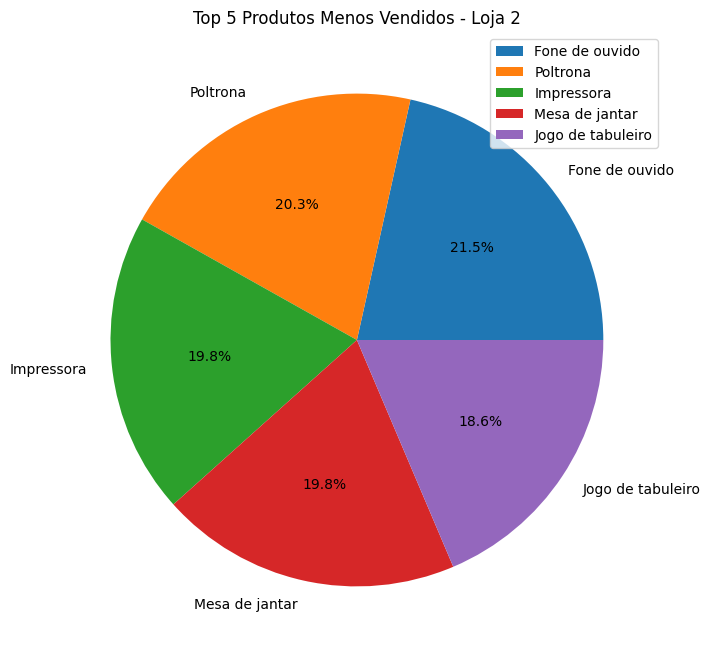

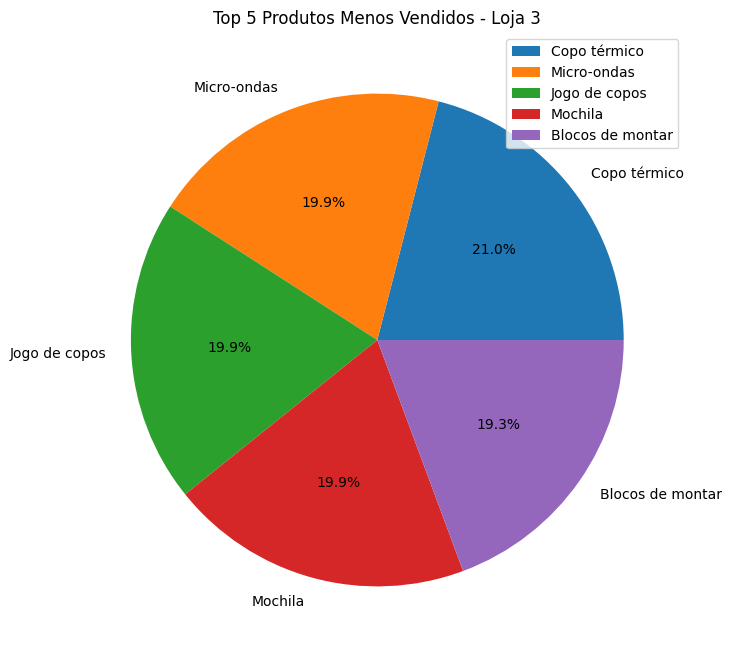

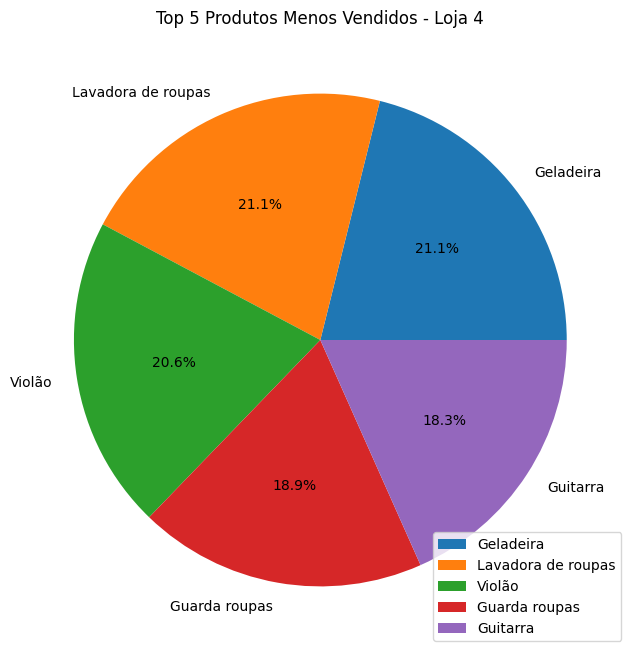

In [96]:
plot = produtosMenosVendidos1.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Menos Vendidos - Loja 1')
plt.ylabel('')
plt.show()

plot = produtosMenosVendidos2.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Menos Vendidos - Loja 2')
plt.ylabel('')
plt.show()

plot = produtosMenosVendidos3.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Menos Vendidos - Loja 3')
plt.ylabel('')
plt.show()

plot = produtosMenosVendidos4.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Menos Vendidos - Loja 4')
plt.ylabel('')
plt.show()


# 5. Frete Médio por Loja

In [76]:
print(loja['Frete'].mean())
print(loja2['Frete'].mean())
print(loja3['Frete'].mean())
print(loja4['Frete'].mean())


34.69180491551149
33.62194065817927
33.07446427411743
31.278997081841727


<Axes: >

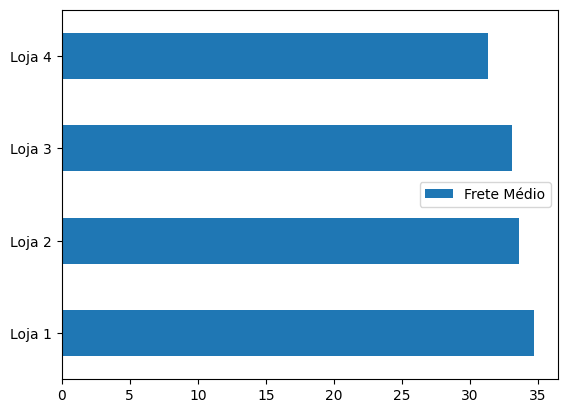

In [77]:
valores = [loja['Frete'].mean(), loja2['Frete'].mean(), loja3['Frete'].mean(), loja4['Frete'].mean()]
index = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

df = pd.DataFrame(valores, index=index, columns=['Frete Médio'])
df.plot.barh()

# Relatório Final

## Introdução
O objetivo dessa análise é avaliar o desempenho das 4 lojas do Senhor João, afim de vender a loja com o menor desempenho geral. A análise foi feita levando em conta o faturamento, vendas por categoria, médias de avaliação, produtos mais e menos vendidos e também o frete médio por loja.

## Metodologia
As análises foram feitas utilizando 4 bases de dados contendo as últimas vendas de cada uma das lojas. A partir dessas bases de dados, foi utilizada a biblioteca Pandas para extração, e juntamente com o matplotlib, plotagem de diversos gráficos diferentes para visualização dos dados.














### **Análise do Faturamento**

Os faturamentos totais de cada loja foram:

- Faturamento da Loja 1:  R$1.534.509,12

- Faturamento da Loja 2:  R$1.488.459,06

- Faturamento da Loja 3:  R$1.464.025,03

- Faturamento da Loja 4:  R$1.384.497,58


A loja com maior faturamento e um adicional de R$ 46.050,06 do segundo maior faturamento foi a Loja 1.

A loja com o menor faturamento foi a Loja 4.

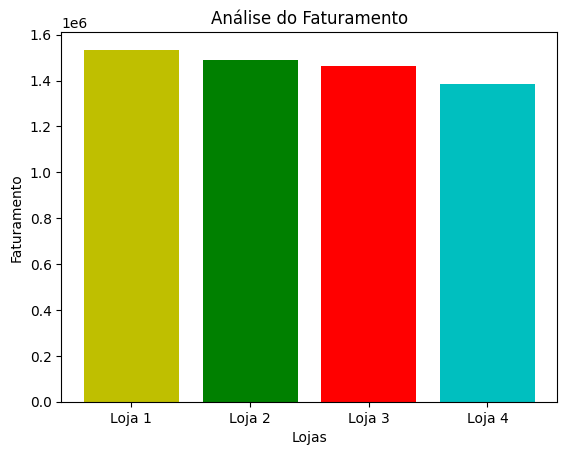

### **Venda por Categoria**

A soma de vendas por categoria de cada loja foi concatenada em um único dataframe para facilitar a análise das vendas no geral.

A visualização abaixo permite ver quais lojas tem um desempenho melhor em cada categoria, e também quais categorias tem mais vendas dentre as quatro lojas.

As categorias mais populares são Móveis, Eletrônicos, Brinquedos, Eletrodomésticos e Esporte & Lazer.

Nessas categorias, as seguintes lojas são destaque:
- Móveis: Loja 3
- Eletrônicos: Lojas 3 e 4
- Brinquedos: Loja 4
- Eletrodomésticos: Loja 1
- Esporte & Lazer: Loja 1

Também é possível ver que a loja com menor desempenho nas vendas por categoria é a **Loja 2**, tendo a menor quantidade de vendas nas categorias Brinquedos, Eletrônicos, Esporte & Lazer e Móveis.

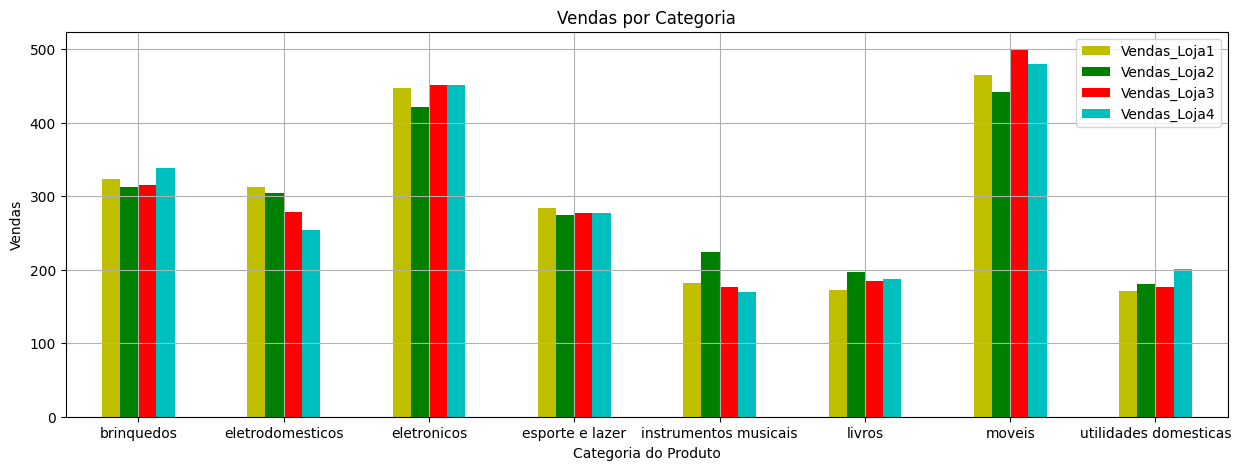

### Média de Avaliação das Lojas

Utilizando a função `mean()`, obtemos as médias de Avaliação da Compra geral de cada loja. Como pode-se observar no gráfico abaixo, a loja com a maior avaliação em média, é a Loja 3, e a loja de pior avaliação é a Loja 1.

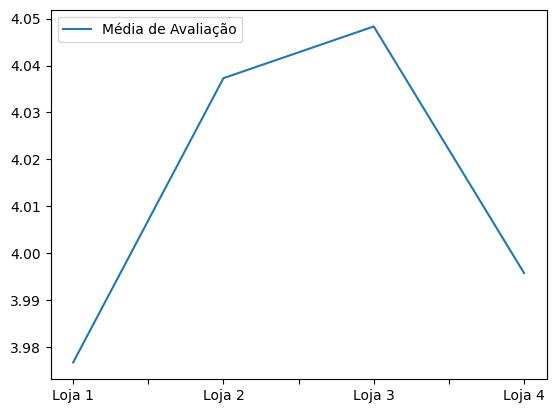

Considerando que as categorias mais importantes precisam ter avaliações mais altas, uma vez que tem mais vendas, também foi feita essa análise de avaliação por categoria.

A loja com melhor avaliação nas categorias principais foi a loja 3. A pior foi mais uma vez a loja 1.

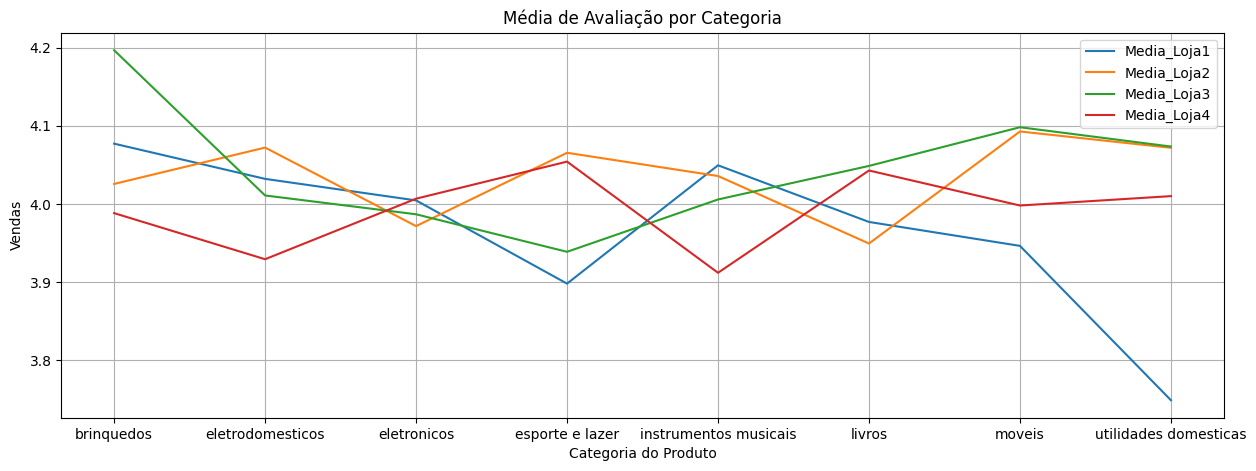


### **Produtos Mais e Menos Vendidos**

É possível visualizar nos gráficos de pizza os 5 produtos mais vendidos e menos vendidos de cada loja.

#### **Top 5 Produtos Mais Vendidos:**

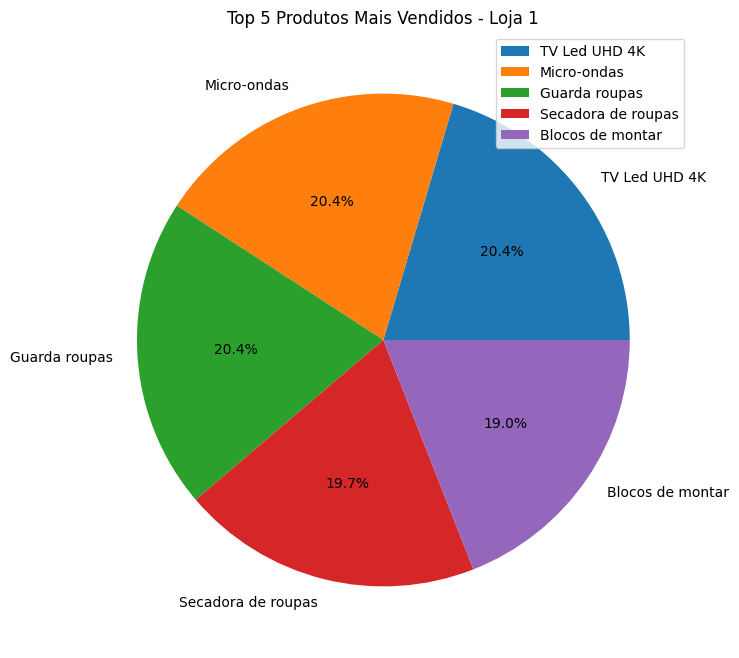

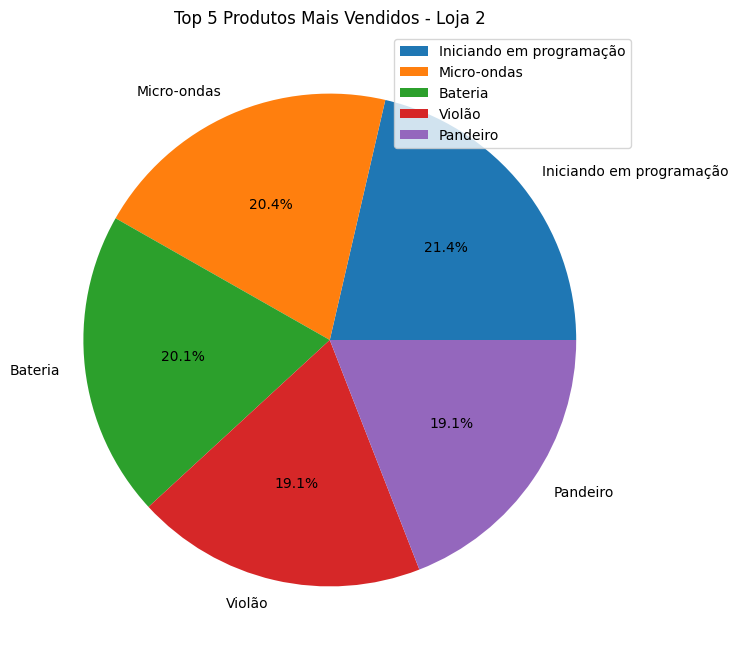

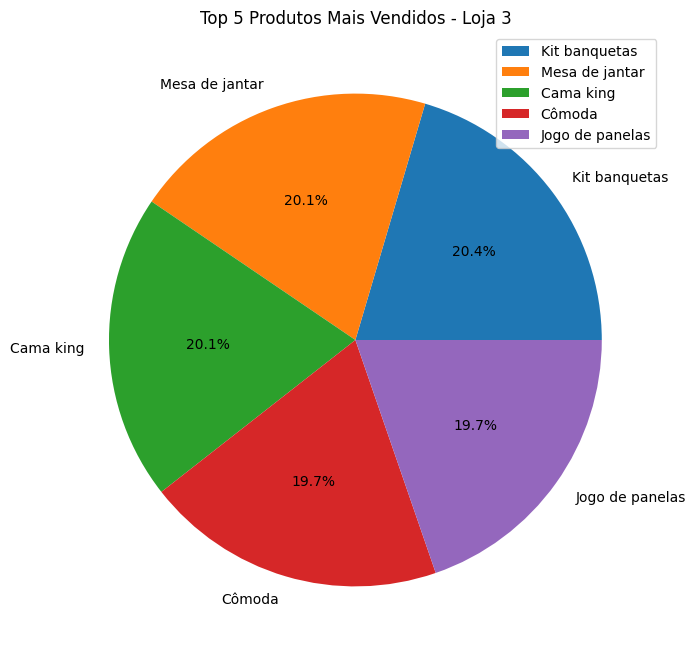

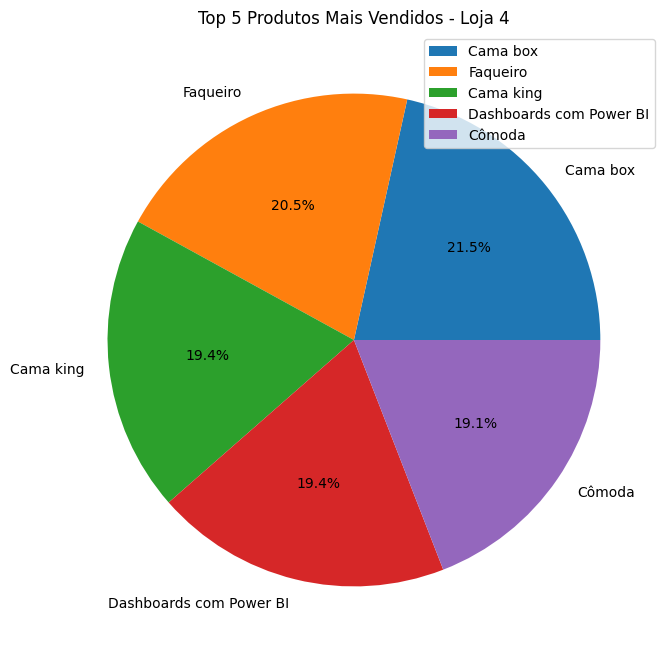

In [98]:
plot = produtosMaisVendidos1.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Mais Vendidos - Loja 1')
plt.ylabel('')
plt.show()

plot = produtosMaisVendidos2.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Mais Vendidos - Loja 2')
plt.ylabel('')
plt.show()

plot = produtosMaisVendidos3.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Mais Vendidos - Loja 3')
plt.ylabel('')
plt.show()

plot = produtosMaisVendidos4.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Mais Vendidos - Loja 4')
plt.ylabel('')
plt.show()


#### **Top 5 Produtos Menos Vendidos:**

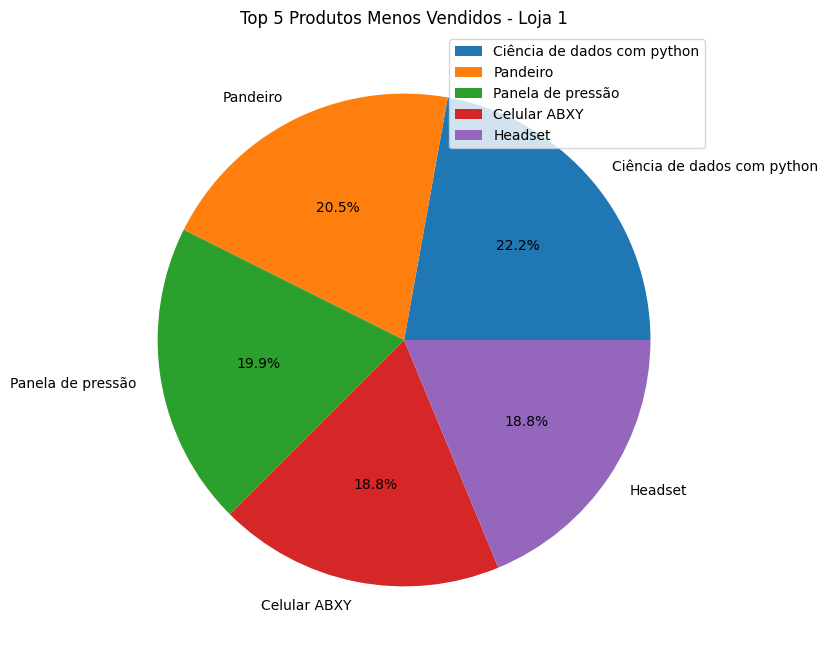

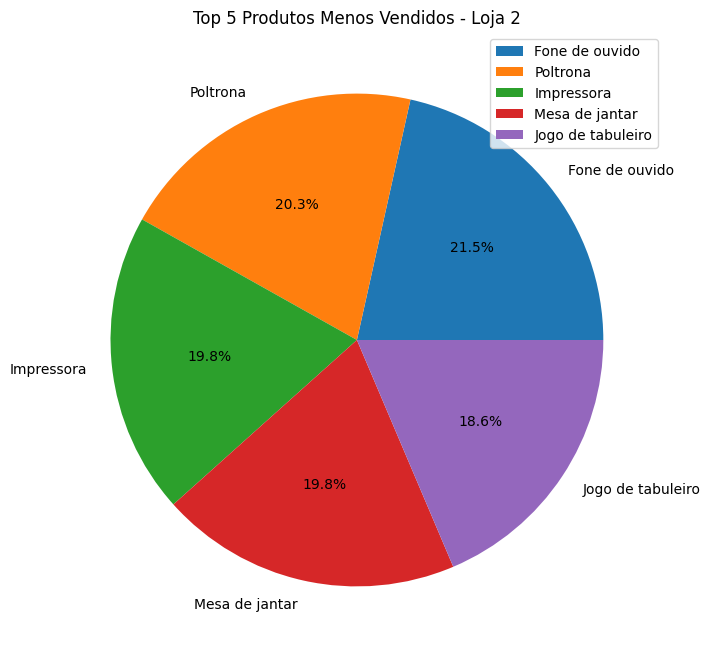

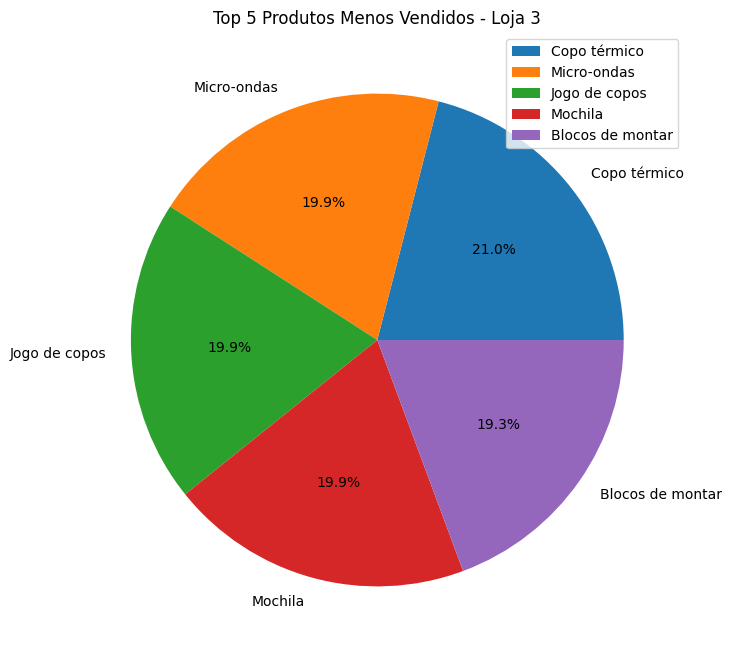

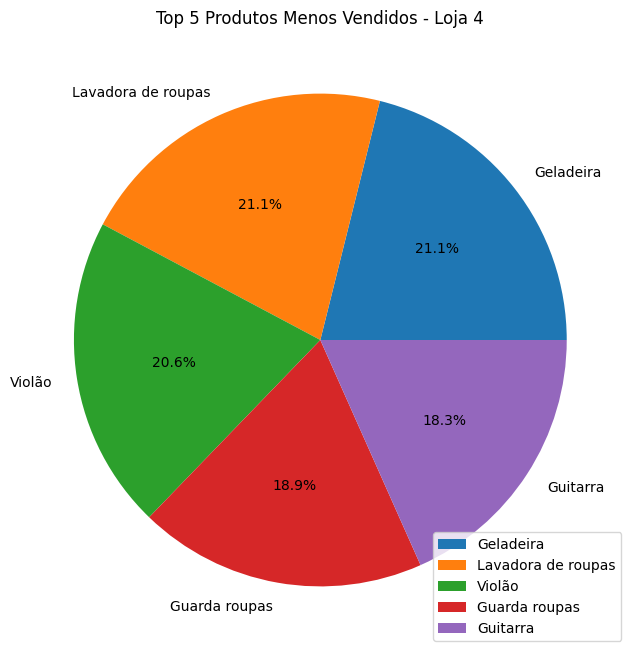

In [97]:
plot = produtosMenosVendidos1.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Menos Vendidos - Loja 1')
plt.ylabel('')
plt.show()

plot = produtosMenosVendidos2.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Menos Vendidos - Loja 2')
plt.ylabel('')
plt.show()

plot = produtosMenosVendidos3.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Menos Vendidos - Loja 3')
plt.ylabel('')
plt.show()

plot = produtosMenosVendidos4.plot.pie(y='Unidades_Vendidas', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 5 Produtos Menos Vendidos - Loja 4')
plt.ylabel('')
plt.show()



### Frete Médio por Loja

Pode-se observar no gráfico abaixo que o maior frete em média é o da loja 1, e o menor é o da loja 4.

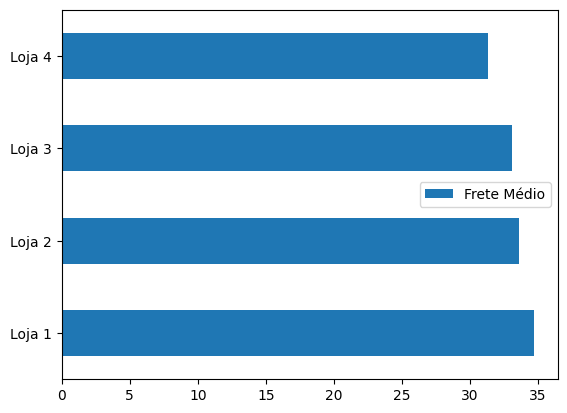

### Conclusão

Com a análise prévia desses dados, é possível chegar aos pontos fortes e fracos de cada loja.

Foi feita uma tabela para a melhor visualização desses pontos e também para chegar a decisão final de qual loja vender.

#### Loja 1:
| Pontos Fortes | Pontos Fracos |
|:---------- | :----------:|
|

# Rascunho

In [ ]:
vendaporCategoria_loja = loja.groupby('Categoria do Produto')['Preço'].sum()
vendaporCategoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
vendaporCategoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
vendaporCategoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

In [ ]:
produtos = list(loja['Categoria do Produto'].unique())
produtos

In [ ]:
produtos = list(vendaporCategoria_loja.index)
vendas =

In [ ]:
produtos_loja = list(vendaporCategoria_loja.index)
valor = list(vendaporCategoria_loja.values)

fig, ax = plt.subplots()
y_pos = np.arange(len(produtos_loja))

ax.barh(y_pos, valor, align='center')
ax.set_yticks(y_pos, labels=produtos_loja)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas')
ax.set_title('Vendas por Categoria')

plt.show()

In [ ]:
produtos_loja = list(vendaporCategoria_loja.index)
valor = list(vendaporCategoria_loja.values)
valor = list(vendaporCategoria_loja.values)
valor2 = list(vendaporCategoria_loja2.values)
valor3 = list(vendaporCategoria_loja3.values)
valor4 = list(vendaporCategoria_loja4.values)

valores = {
      'Loja 1': np.array(valor),
      'Loja 2': np.array(valor2),
      'Loja 3': np.array(valor3),
      'Loja 4': np.array(valor4)
}

fig, ax = plt.subplots()
bottom = np.zeros(len(produtos_loja))
for loja, valor in valores.items():
    p = ax.barh(produtos_loja, valor, label=loja, left=bottom)
    bottom += valor
    ax.bar_label(p, label_type='center')

ax.set_title('Vendas por Categoria')
ax.invert_yaxis()
ax.set_ylabel('Categorias de Produtos')
ax.set_xlabel('Quantidade de Vendas')
ax.legend()
plt.show()

venda por categoria

In [ ]:
import numpy as np

In [ ]:
produtos_loja = list(vendaporCategoria_loja.index)
valor = list(vendaporCategoria_loja.values)
valor = list(vendaporCategoria_loja.values)
valor2 = list(vendaporCategoria_loja2.values)
valor3 = list(vendaporCategoria_loja3.values)
valor4 = list(vendaporCategoria_loja4.values)

valores = {
      'Loja 1': np.array(valor),
      'Loja 2': np.array(valor2),
      'Loja 3': np.array(valor3),
      'Loja 4': np.array(valor4)
}

fig, ax = plt.subplots()
bottom = np.zeros(len(produtos_loja))
for loja, valor in valores.items():
    p = ax.barh(produtos_loja, valor, label=loja, left=bottom)
    bottom += valor
    ax.bar_label(p, label_type='center')

ax.set_title('Vendas por Categoria Geral')
ax.invert_yaxis()
ax.set_ylabel('Categorias de Produtos')
ax.set_xlabel('Quantidade de Vendas')
ax.legend()
plt.show()

### Análise Individual:

In [ ]:
# ------------- Loja 1 -------------------------
produtos_loja = list(vendaporCategoria_loja.index)
valor = list(vendaporCategoria_loja.values)

fig, ax = plt.subplots(figsize=(7, 3))
y_pos = np.arange(len(produtos_loja))

p = ax.barh(y_pos, valor, align='center')
ax.set_yticks(y_pos, labels=produtos_loja)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas da Loja 1')
ax.set_title('Vendas por Categoria da Loja 1')
ax.bar_label(p, label_type='edge', fmt='%d')

# ------------ Loja 2 ---------------------------
produtos_loja2 = list(vendaporCategoria_loja2.index)
valor2 = list(vendaporCategoria_loja2.values)

fig, ax = plt.subplots(figsize=(7, 3))
y_pos = np.arange(len(produtos_loja2))

p = ax.barh(y_pos, valor2, align='center')
ax.set_yticks(y_pos, labels=produtos_loja2)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas da Loja 2')
ax.set_title('Vendas por Categoria da Loja 2')
ax.bar_label(p, label_type='edge', fmt='%d')

# ----------------- Loja 3 ------------------------
produtos_loja3 = list(vendaporCategoria_loja3.index)
valor3 = list(vendaporCategoria_loja3.values)

fig, ax = plt.subplots(figsize=(7, 3))
y_pos = np.arange(len(produtos_loja3))

p = ax.barh(y_pos, valor3, align='center')
ax.set_yticks(y_pos, labels=produtos_loja3)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas da Loja 3')
ax.set_title('Vendas por Categoria da Loja 3')
ax.bar_label(p, label_type='edge', fmt='%d')
plt.show()

# ------------------ Loja 4 -----------------------
produtos_loja4 = list(vendaporCategoria_loja4.index)
valor4 = list(vendaporCategoria_loja4.values)

fig, ax = plt.subplots(figsize=(7, 3))
y_pos = np.arange(len(produtos_loja4))

p = ax.barh(y_pos, valor4, align='center')
ax.set_yticks(y_pos, labels=produtos_loja4)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de Vendas da Loja 4')
ax.set_title('Vendas por Categoria da Loja 4')
ax.bar_label(p, label_type='edge', fmt='%d')

### Análise por Categoria Individual


In [ ]:
# quero fazer graficos pizza para colocar a venda total de cada categoria e quanto cada loja vendeu nessa categoria


In [ ]:
plot = vendaporCategoria_loja.plot(title="Vendas por Categoria Loja 1", figsize=(15, 5), grid=True, ylabel='Vendas')


In [ ]:
df1 = vendaporCategoria_loja.reset_index()
ax = df1.plot.barh(x="Categoria do Produto", y="Produto", title="Vendas por Categoria - Loja 1", color='y')

df2 = vendaporCategoria_loja2.reset_index()
ax = df2.plot.barh(x="Categoria do Produto", y="Produto", title="Vendas por Categoria - Loja 2", color='g')

df3 = vendaporCategoria_loja3.reset_index()
ax = df3.plot.barh(x="Categoria do Produto", y="Produto", title="Vendas por Categoria - Loja 3", color = 'r')

df4 = vendaporCategoria_loja4.reset_index()
ax = df4.plot.barh(x="Categoria do Produto", y="Produto", title="Vendas por Categoria - Loja 4", color = 'c')

Os produtos mais vendidos de cada loja são:

- Loja 1:
  - TV  Led UHD 4K
  - Micro-ondas
  - Guarda roupas
  - Secadora de roupas
  - Blocos de Montar

- Loja 2:
  - Iniciando em programação
  - Micro-ondas
  - Bateria
  - Pandeiro
  - Violão

- Loja 3:
  - Kit banquetas
  - Mesa de jantar
  - Cama king
  - Cômoda
  - jogo de panelas

- Loja 4:
  - Cama box
  - Faqueiro
  - Cama king
  - Cômoda
  - Dashboards com Power BI


Os produtos menos vendidos de cada loja são:

- Loja 1:
  - Ciência de dados com python
  - Pandeiro
  - Panela de pressão
  - Celular ABXY
  - Headset

- Loja 2:
  - Fone de ouvido
  - Poltrona
  - impressora
  - Mesa de jantar
  - jogo de tabuleiro

- Loja 3:
  - Copo-Térmico
  - Micro-ondas
  - jogo de copos
  - Mochila
  - Blocos de montar

- Loja 4:
  - Geladeira
  - Lavadora de roupas
  - Violão
  - Guarda roupas
  - Guitarra
